### Imports

In [4]:
from Garage import Augmenter
from PIL import Image

### Model initialization

In [5]:
model = Augmenter()

Loading checkpoint shards:   0%|          | 0/4 [00:00<?, ?it/s]

Loading checkpoint shards:   0%|          | 0/3 [00:00<?, ?it/s]

Loading pipeline components...:   0%|          | 0/6 [00:00<?, ?it/s]

/home/jovyan/.mlspace/envs/gen_aug/lib/python3.10/site-packages/transformers/models/clip/feature_extraction_clip.py:28: FutureWarning: The class CLIPFeatureExtractor is deprecated and will be removed in version 5 of Transformers. Please use CLIPImageProcessor instead.
  warnings.warn(
An error occurred while trying to fetch checkpoints/ppt-v2-1/realisticVisionV60B1_v51VAE/vae: Error no file named diffusion_pytorch_model.safetensors found in directory checkpoints/ppt-v2-1/realisticVisionV60B1_v51VAE/vae.
Defaulting to unsafe serialization. Pass `allow_pickle=False` to raise an error instead.
An error occurred while trying to fetch checkpoints/ppt-v2-1/realisticVisionV60B1_v51VAE/unet: Error no file named diffusion_pytorch_model.safetensors found in directory checkpoints/ppt-v2-1/realisticVisionV60B1_v51VAE/unet.
Defaulting to unsafe serialization. Pass `allow_pickle=False` to raise an error instead.
You have disabled the safety checker for <class 'Garage.models.PowerPaint.pipelines.pipe

08/08 23:56:55 - mmengine - INFO - Successfully add external embeddings: P_ctxt, P_shape, P_obj.
08/08 23:56:55 - mmengine - INFO - Successfully add trainable external embeddings: P_ctxt, P_shape, P_obj


/home/jovyan/ddorin/generative_augmentation/Garage/Garage/models/PowerPaintModel.py:90: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  torch.load(os.path.join(self.checkpoint

### Example of working

In [6]:
image = Image.open("examples/image.jpg")
cat_mask = Image.open("examples/cat_mask.jpg")

  0%|          | 0/50 [00:00<?, ?it/s]

New object: dog, prompt: The dog is a medium-sized, brown-coated, and fluffy golden retriever in a sitting position.



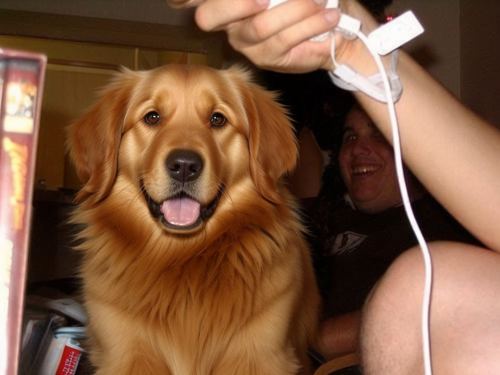

In [8]:
new_image, (prompt, new_object) = model(image=image,
                                    mask=cat_mask,
                                    current_object="cat",
                                    new_objects_list=None,
                                    ddim_steps=50,
                                    guidance_scale=5,
                                    seed=2,
                                    return_prompt=True)

print(f'New object: {new_object}, prompt: {prompt}\n')
new_image.show()

  0%|          | 0/50 [00:00<?, ?it/s]

New object: bear, prompt: The bear is a large, brown grizzly with a distinctive silver-tipped coat and a gentle expression.



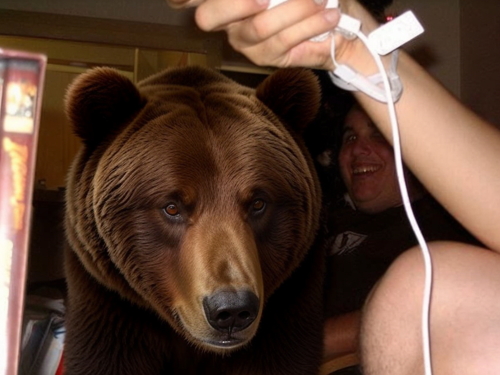

In [13]:
new_image, (prompt, new_object) = model(image=image,
                                    mask=cat_mask,
                                    current_object="cat",
                                    new_objects_list=["train", "tree", "bear", "rabbit", "wolf", "car"],
                                    ddim_steps=50,
                                    guidance_scale=5,
                                    seed=41,
                                    return_prompt=True)

print(f'New object: {new_object}, prompt: {prompt}\n')
new_image.show()